In [1]:
import numpy as np
import qnmfits.qnm as qnm

import matplotlib.pyplot as plt
import rcparams
plt.rcParams.update(rcparams.params)

from scipy.optimize import minimize

In [2]:
# G/c**3 (s/kg)
conversion = 2.477e-36

# Solar mass (kg)
M_sun = 2e30

In [3]:
def fun(chi, Q_star, l, m, n):
    
    omega = qnm.omega(l, m, n, 1, chi)
    f = np.real(omega)/(2*np.pi)
    tau = -1/np.imag(omega)
    Q = np.pi*f*tau
    
    return abs(Q_star - Q)

Measurement compatible with modes:
(2, 1, 0), chi = 0.949, Mf = 87.068 solar masses
(2, 2, 0), chi = 0.853, Mf = 100.429 solar masses
(3, 1, 0), chi = 0.818, Mf = 115.212 solar masses
(3, 2, 0), chi = 0.674, Mf = 120.295 solar masses
(3, 3, 0), chi = 0.563, Mf = 123.417 solar masses
(2, 2, 1), chi = 0.987, Mf = 137.490 solar masses


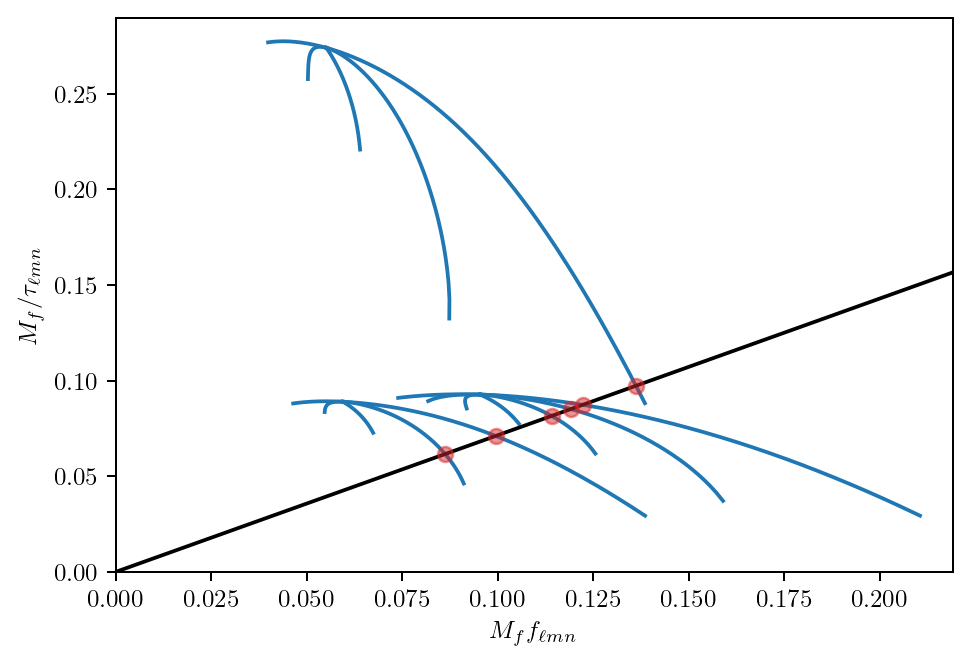

In [4]:
# Base plot
# ---------

fig, ax = plt.subplots(figsize=(6,4), dpi=180)

chi_array = np.linspace(0, 0.99, 200)

for n in range(2):
    for l in range(2,4):
        
        if (l==3) & (n==1):
            pass
        
        else:
            for m in range(-l,l+1):
                
                # Evaluate the QNM frequencies
                frequencies = qnm.omega(l, m, n, 1, chi_array)
                        
                # Add to the figure
                ax.plot(
                    np.real(frequencies)/(2*np.pi), 
                    -np.imag(frequencies), 
                    c='C0'
                )

ax.set_xlabel('$M_ff_{\ell m n}$')
ax.set_ylabel('$M_f/ \\tau_{\ell m n}$')

ax.set_xlim(0)
ax.set_ylim(0)

# Add measurements
# ----------------

# The measured frequency and damping time
f_star = 200
tau_star = 0.007

# The quality factor
Q_star = np.pi*f_star*tau_star

# Add the line corresponding to the measurement
x = np.linspace(0, 1)
ax.plot(x, (np.pi/Q_star)*x, c='k')

# Identify points of intersection between the measurement and the Kerr 
# spectrum

intersected_modes = []
fitted_spins = []
fitted_masses = []

for n in range(2):
    for l in range(2,4):
        
        if (l==3) & (n==1):
            pass
        
        else:
            for m in range(-l,l+1):
                result = minimize(
                    fun, 
                    x0=0.5, 
                    args=(Q_star, l, m, n), 
                    bounds=[(0.,0.99)]
                )
                if result['fun']<1e-5:
                    
                    chi_fit = result['x'][0]
                    omega_fit = qnm.omega(l, m, n, 1, chi_fit)
                    
                    Mf_fit = (np.real(omega_fit)/(2*np.pi))/(f_star*conversion)
                    
                    intersected_modes.append((l,m,n))
                    fitted_spins.append(chi_fit)
                    fitted_masses.append(Mf_fit)
                    
                    ax.plot(
                        np.real(omega_fit)/(2*np.pi), 
                        -np.imag(omega_fit), 
                        'o', 
                        c='C3',
                        alpha=0.5
                    )
                    
print('Measurement compatible with modes:')
for mode, chi, Mf in zip(intersected_modes, fitted_spins, fitted_masses):
    print(f'{mode}, chi = {chi:.3f}, Mf = {Mf/M_sun:.3f} solar masses')

In [5]:
def bh_spectroscopy(f_star, tau_star, plot=True, verbose=True):
    
    # The quality factor
    Q_star = np.pi*f_star*tau_star
    
    if plot:
        
        # Base plot
        # ---------

        fig, ax = plt.subplots(figsize=(6,4)) # , dpi=180)

        chi_array = np.linspace(0, 0.99, 200)

        for n in range(2):
            for l in range(2,4):

                if (l==3) & (n==1):
                    pass

                else:
                    for m in range(-l,l+1):

                        # Evaluate the QNM frequencies
                        frequencies = qnm.omega(l, m, n, 1, chi_array)

                        # Add to the figure
                        ax.plot(
                            np.real(frequencies)/(2*np.pi), 
                            -np.imag(frequencies), 
                            c='C0'
                        )

        ax.set_xlabel('$M_ff_{\ell m n}$')
        ax.set_ylabel('$M_f/ \\tau_{\ell m n}$')

        ax.set_xlim(0)
        ax.set_ylim(0)

        # Add measurements
        # ----------------

        # Add the line corresponding to the measurement
        x = np.linspace(0, 1)
        ax.plot(x, (np.pi/Q_star)*x, c='k')

    # Identify points of intersection between the measurement and the Kerr 
    # spectrum

    intersected_modes = []
    fitted_spins = []
    fitted_masses = []

    for n in range(2):
        for l in range(2,4):

            if (l==3) & (n==1):
                pass

            else:
                for m in range(-l,l+1):
                    result = minimize(
                        fun, 
                        x0=0.5, 
                        args=(Q_star, l, m, n), 
                        bounds=[(0.,0.99)]
                    )
                    if result['fun']<1e-5:

                        chi_fit = result['x'][0]
                        omega_fit = qnm.omega(l, m, n, 1, chi_fit)

                        Mf_fit = (np.real(omega_fit)/(2*np.pi))/(f_star*conversion)

                        intersected_modes.append((l,m,n))
                        fitted_spins.append(chi_fit)
                        fitted_masses.append(Mf_fit)
                        
                        if plot:
                            ax.plot(
                                np.real(omega_fit)/(2*np.pi), 
                                -np.imag(omega_fit), 
                                'o', 
                                c='C3',
                                alpha=0.5
                            )
    
    if verbose:
        print('Measurement compatible with modes:')
        for mode, chi, Mf in zip(intersected_modes, fitted_spins, fitted_masses):
            print(f'{mode}, chi = {chi:.3f}, Mf = {Mf/M_sun:.3f} solar masses')
        
    for mode, chi, Mf in zip(intersected_modes, fitted_spins, fitted_masses):
        if mode == (2,2,1):
            return (chi, Mf/M_sun)

Measurement compatible with modes:
(2, 1, 0), chi = 0.949, Mf = 87.068 solar masses
(2, 2, 0), chi = 0.853, Mf = 100.429 solar masses
(3, 1, 0), chi = 0.818, Mf = 115.212 solar masses
(3, 2, 0), chi = 0.674, Mf = 120.295 solar masses
(3, 3, 0), chi = 0.563, Mf = 123.417 solar masses
(2, 2, 1), chi = 0.987, Mf = 137.490 solar masses


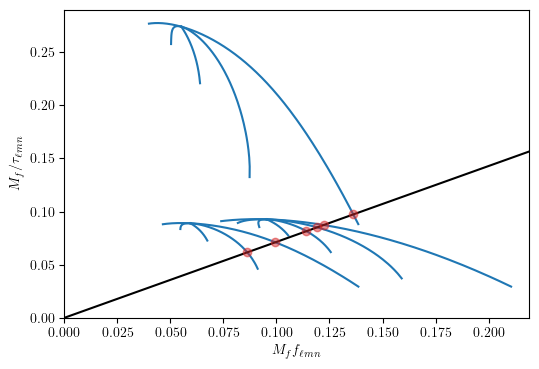

In [6]:
_ = bh_spectroscopy(f_star = 200, tau_star = 0.007)

Measurement compatible with modes:
(2, 1, 1), chi = 0.952, Mf = 85.532 solar masses
(2, 2, 1), chi = 0.858, Mf = 100.148 solar masses


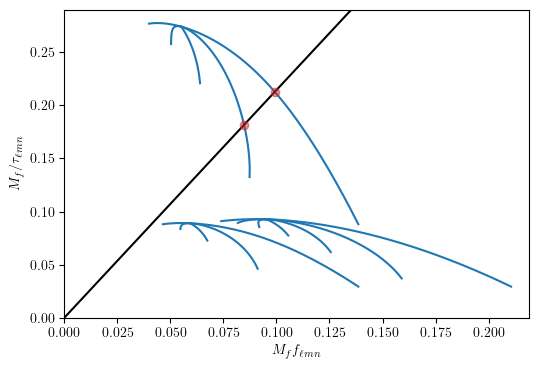

In [22]:
_ = bh_spectroscopy(f_star = 2.00000000e+02, tau_star = 2.33333333e-03)

In [7]:
bh_spectroscopy(f_star = 300, tau_star = 0.001, plot=False)

Measurement compatible with modes:
(2, 1, 1), chi = 0.761, Mf = 48.825 solar masses
(2, 2, 1), chi = 0.597, Mf = 51.281 solar masses


(0.5973906423287315, 51.280993753972005)

In [20]:
f_array = np.linspace(200, 300, 10)
tau_array = np.linspace(0.001, 0.005, 10)

chi_target = 0.853
Mf_target = 100.429 

results = []

for f_star in f_array:
    for tau_star in tau_array:
        chi_Mf = bh_spectroscopy(f_star, tau_star, plot=False, verbose=False)
        if chi_Mf is not None:
            chi = chi_Mf[0]
            Mf = chi_Mf[1]
            diff = (chi-chi_target)**2 + ((Mf-Mf_target)/Mf)**2
            results.append((f_star, tau_star, diff))

In [21]:
results = np.array(results)
results[np.argmin(results[:,-1])]

array([2.00000000e+02, 2.33333333e-03, 3.07292839e-05])